In [2]:
import requests
import json
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re as re
from fugitiveData import Fugitive
import pprint
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
i = 1
hasContent = True
empty = []
while hasContent:
    response = requests.get('https://api.fbi.gov/wanted/v1/list', params={
        'page': i
    }).json()['items']

    if pd.DataFrame(response).empty:
        hasContent = False
        continue
    else:
        for item in response:
            empty.append(item)
        i += 1

data = pd.DataFrame(empty)

In [4]:
fugitives = []
for i in range(0, data.shape[0]):
    fugitives.append(Fugitive(data.iloc[i, :]))

df = pd.DataFrame([x.to_dict() for x in fugitives])

In [5]:
df

,Details,Remarks,NCIC,Scars & Marks,Images,Person Classification,Height Min,Race,Age Range,Aliases,...,Legal Names,Possible Countries,Sex,Place of Birth,Dates of Birth Used,Hair Raw,Hair,Coordinates,Field Offices,@ID
0,None,None,W031095905,Bright has a scar on his right finger.,<fugitiveData.FImages object at 0x1241cd590>,Main,71.0,black,None,McRay M. Bright,...,None,None,male,Illinois,"[May 28, 1987]",Black,black,None,[chicago],https://api.fbi.gov/@wanted-person/54d95b077b5...
1,The Federal Bureau of Investigation's Albuquer...,None,None,None,<fugitiveData.FImages object at 0x12441ebd0>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,"[albuquerque, dallas]",https://api.fbi.gov/@wanted-person/40f9a069785...
2,"On January 27, 2002, at approximately 11:50 p....",None,None,None,<fugitiveData.FImages object at 0x1246467d0>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,[denver],https://api.fbi.gov/@wanted-person/f23b652a5da...
3,"On Saturday, June 25, 2022, the Life Choices b...",None,None,None,<fugitiveData.FImages object at 0x12486ed10>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,[denver],https://api.fbi.gov/@wanted-person/1501448d52d...
4,"In the early morning hours of January 17, 2023...",None,None,None,<fugitiveData.FImages object at 0x124878290>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,None,[charlotte],https://api.fbi.gov/@wanted-person/775553e7d13...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,None,None,None,None,<fugitiveData.FImages object at 0x12528fe10>,Main,NaN,white,None,Mrb3hz4d”,...,None,None,male,None,None,Brown,brown,None,[boston],https://api.fbi.gov/@wanted-person/3fb348cb7d0...
968,The FBI Norfolk Field Office is asking for the...,None,None,None,<fugitiveData.FImages object at 0x12529c450>,Victim,NaN,None,None,None,...,None,None,None,None,None,None,None,None,[norfolk],https://api.fbi.gov/@wanted-person/402ee4b4f18...
969,None,Fisher is physically fit and is an avid outdoo...,None,Fisher has surgical scars on his lower back.,<fugitiveData.FImages object at 0x12529f850>,Main,72.0,white,None,Robert W. Fisher,...,None,None,male,"Brooklyn, New York","[April 13, 1961]",Brown,brown,None,[phoenix],https://api.fbi.gov/@wanted-person/83a7764745a...
970,"On May 22, 1989, Dawn Marie Mozino was last se...",None,None,None,<fugitiveData.FImages object at 0x1252a9490>,Main,58.0,white,None,None,...,None,None,female,None,None,"Brown, Curly",brown,None,None,https://api.fbi.gov/@wanted-person/6821fa45714...


In [6]:
data_mapped = df.copy()
data_mapped['Eyes Raw'] = data_mapped['Eyes Raw'].map({'Brown': 1, 'Green':2, 'Blue':3, 'Hazel': 4, 'Blue/Green': 5, 'None':0, 'Unknown':0 })


In [7]:
x = data_mapped.iloc[:,12:13]
x = x.fillna(0)
x

,Eyes Raw
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
967,1.0
968,0.0
969,3.0
970,1.0


In [8]:
kmeans = KMeans(4)
kmeans.fit(x)

/Users/pablobedolla/Documents/FBIAPI/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [9]:
identified_clusters = kmeans.fit_predict(x)

/Users/pablobedolla/Documents/FBIAPI/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
identified_clusters

array([0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 3, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2,
       0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 3, 0, 1, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 1, 3, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       3, 1, 0, 0, 1, 1, 0, 1, 1, 0, 3, 0, 1, 0, 2, 1, 3, 3, 1, 1, 2, 0,
       1, 0, 3, 1, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 3, 2, 0, 2, 0, 1, 0, 0,

In [11]:
data_w_clusters = data_mapped.copy()
data_w_clusters['Cluster'] = identified_clusters
data_w_clusters

,Details,Remarks,NCIC,Scars & Marks,Images,Person Classification,Height Min,Race,Age Range,Aliases,...,Possible Countries,Sex,Place of Birth,Dates of Birth Used,Hair Raw,Hair,Coordinates,Field Offices,@ID,Cluster
0,None,None,W031095905,Bright has a scar on his right finger.,<fugitiveData.FImages object at 0x1241cd590>,Main,71.0,black,None,McRay M. Bright,...,None,male,Illinois,"[May 28, 1987]",Black,black,None,[chicago],https://api.fbi.gov/@wanted-person/54d95b077b5...,0
1,The Federal Bureau of Investigation's Albuquer...,None,None,None,<fugitiveData.FImages object at 0x12441ebd0>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,"[albuquerque, dallas]",https://api.fbi.gov/@wanted-person/40f9a069785...,2
2,"On January 27, 2002, at approximately 11:50 p....",None,None,None,<fugitiveData.FImages object at 0x1246467d0>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,[denver],https://api.fbi.gov/@wanted-person/f23b652a5da...,2
3,"On Saturday, June 25, 2022, the Life Choices b...",None,None,None,<fugitiveData.FImages object at 0x12486ed10>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,[denver],https://api.fbi.gov/@wanted-person/1501448d52d...,2
4,"In the early morning hours of January 17, 2023...",None,None,None,<fugitiveData.FImages object at 0x124878290>,Main,NaN,None,None,None,...,None,None,None,None,None,None,None,[charlotte],https://api.fbi.gov/@wanted-person/775553e7d13...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,None,None,None,None,<fugitiveData.FImages object at 0x12528fe10>,Main,NaN,white,None,Mrb3hz4d”,...,None,male,None,None,Brown,brown,None,[boston],https://api.fbi.gov/@wanted-person/3fb348cb7d0...,0
968,The FBI Norfolk Field Office is asking for the...,None,None,None,<fugitiveData.FImages object at 0x12529c450>,Victim,NaN,None,None,None,...,None,None,None,None,None,None,None,[norfolk],https://api.fbi.gov/@wanted-person/402ee4b4f18...,2
969,None,Fisher is physically fit and is an avid outdoo...,None,Fisher has surgical scars on his lower back.,<fugitiveData.FImages object at 0x12529f850>,Main,72.0,white,None,Robert W. Fisher,...,None,male,"Brooklyn, New York","[April 13, 1961]",Brown,brown,None,[phoenix],https://api.fbi.gov/@wanted-person/83a7764745a...,1
970,"On May 22, 1989, Dawn Marie Mozino was last se...",None,None,None,<fugitiveData.FImages object at 0x1252a9490>,Main,58.0,white,None,None,...,None,female,None,None,"Brown, Curly",brown,None,None,https://api.fbi.gov/@wanted-person/6821fa45714...,0


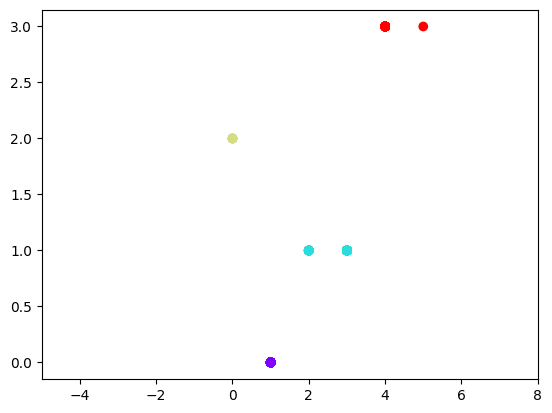

In [12]:
plt.scatter(data_w_clusters['Eyes Raw'], data_w_clusters['Cluster'], c=data_w_clusters['Cluster'], cmap='rainbow')
plt.xlim(-5, 8)
plt.xlim(-5,8)
plt.show()

NetworkX Graph

In [13]:
x = x['Eyes Raw'].astype(np.int64)
data_w_clusters['Cluster'] = data_w_clusters['Cluster'].astype(np.int64)

In [19]:
x.iloc[:]

0      1
1      0
2      0
3      0
4      0
      ..
967    1
968    0
969    3
970    1
971    0
Name: Eyes Raw, Length: 972, dtype: int64

In [21]:
data_w_clusters['Cluster']

0      0
1      2
2      2
3      2
4      2
      ..
967    0
968    2
969    1
970    0
971    2
Name: Cluster, Length: 972, dtype: int64

In [22]:
fugitive_graph = nx.from_pandas_edgelist(df, source=x.iloc[:], target=data_w_clusters['Cluster']) # useless, playing with nx for now

KeyError: "None of [Int64Index([1, 0, 0, 0, 0, 1, 0, 1, 0, 2,\n            ...\n            0, 0, 0, 3, 1, 1, 0, 3, 1, 0],\n           dtype='int64', length=972)] are in the [columns]"

In [23]:
type(fugitive_graph)

NameError: name 'fugitive_graph' is not defined

In [24]:
nx.number_of_nodes(fugitive_graph)

NameError: name 'fugitive_graph' is not defined

In [25]:
fugitive_graph.nodes

NameError: name 'fugitive_graph' is not defined

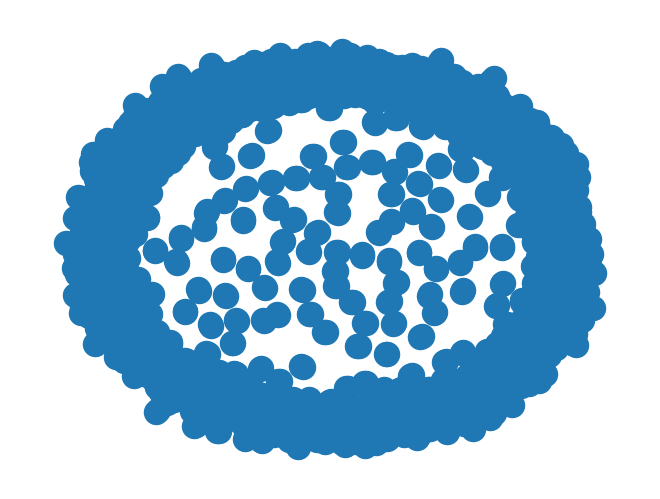

In [27]:
nx.draw(fugitive_graph)